# Classifying movie reviews

-binary classification

### Data - IMDB dataset

In [3]:
#importing and loading dataset
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 1000)

Using TensorFlow backend.


17465344/17464789 [==============================] - 24s 1us/step


In [4]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 2,
 2,
 65,
 458,
 2,
 66,
 2,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 2,
 2,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2,
 19,
 14,
 22,
 4,
 2,
 2,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 2,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2,
 2,
 16,
 480,
 66,
 2,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 2,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 2,
 15,
 256,
 4,
 2,
 7,
 2,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 2,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2,
 56,
 26,
 141,
 6,
 194,
 2,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 2,
 18,
 51,
 36,
 28,
 224,
 92,
 25,
 104,
 4,
 226,
 65,
 16,
 3

data is encoded (list of word indices)

In [6]:
train_labels[0]

1

target is binary: 1 or 0

In [7]:
#let's try to decode the data into english

word_index = imdb.get_word_index()
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
#since 0,1,2 are reserved for padding, start of sequence, unknown

1646592/1641221 [==============================] - 7s 4us/step


In [8]:
decoded_review

"? this film was just brilliant casting ? ? story direction ? really ? the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same ? ? as myself so i loved the fact there was a real ? with this film the ? ? throughout the film were great it was just brilliant so much that i ? the film as soon as it was released for ? and would recommend it to everyone to watch and the ? ? was amazing really ? at the end it was so sad and you know what they say if you ? at a film it must have been good and this definitely was also ? to the two little ? that played the ? of ? and paul they were just brilliant children are often left out of the ? ? i think because the stars that play them all ? up are such a big ? for the whole film but these children are amazing and should be ? for what they have done don't you think the whole story was so ? because it was true and was ? life after all that was ? with us all"

### data preperation

we should convert our data into tensors before feeding to a neural network


In [13]:
#one hot encoding data
#for 10000 words the dimension will be 10000

import numpy as np
#function to vectorize sequence
def vectorize_sequence(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i,sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [14]:
x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

In [15]:
x_train[0].shape

(10000,)

In [16]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [17]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [18]:
y_train[0]

1.0

### Network

In [22]:
from keras import models,layers

In [56]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [57]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_9 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_10 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 322,177
Trainable params: 322,177
Non-trainable params: 0
_________________________________________________________________


In [58]:
#choosing loss function and optimizer
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [59]:
#creating validation set
x_val=x_train[:10000]
x_train2 = x_train[10000:]
y_val=y_train[:10000]
y_train2=y_train[10000:]

In [63]:
#training
his = model.fit(x_train2,
               y_train2,
               epochs=4,
               batch_size=512,
               validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 7s 478us/step - loss: 0.3172 - accuracy: 0.8710 - val_loss: 0.3739 - val_accuracy: 0.8462
Epoch 2/4
15000/15000 [==============================] - 7s 465us/step - loss: 0.3046 - accuracy: 0.8719 - val_loss: 0.3345 - val_accuracy: 0.8610
Epoch 3/4
15000/15000 [==============================] - 7s 457us/step - loss: 0.2941 - accuracy: 0.8762 - val_loss: 0.3352 - val_accuracy: 0.8606
Epoch 4/4
15000/15000 [==============================] - 7s 449us/step - loss: 0.2852 - accuracy: 0.8834 - val_loss: 0.3361 - val_accuracy: 0.8610


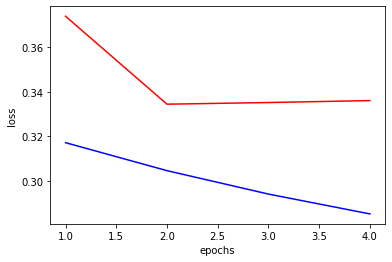

In [64]:
#plotting losses
import matplotlib.pyplot as plt
his_dict = his.history
loss_values = his_dict['loss']
val_loss = his_dict['val_loss']
epochs = range(1, 5)
plt.plot(epochs,loss_values,'b')
plt.plot(epochs,val_loss,'r')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

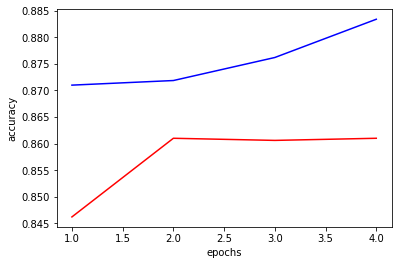

In [65]:
#plotting accuracy
acc_values = his_dict['accuracy']
val_acc_loss = his_dict['val_accuracy']
epochs = range(1, 5)
plt.plot(epochs,acc_values,'b')
plt.plot(epochs,val_acc_loss,'r')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

In [66]:
preds = model.predict(x_test)

In [67]:
preds

array([[0.21373457],
       [0.9920048 ],
       [0.697064  ],
       ...,
       [0.07478581],
       [0.06123675],
       [0.22528288]], dtype=float32)

In [70]:
for i in range(len(preds)):
    if preds[i]>=0.5:
        preds[i]=1
    else:
        preds[i]=0

In [71]:
preds

array([[0.],
       [1.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [82]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

         0.0       0.84      0.87      0.86     12500
         1.0       0.87      0.84      0.85     12500

    accuracy                           0.85     25000
   macro avg       0.86      0.85      0.85     25000
weighted avg       0.86      0.85      0.85     25000



In [83]:
accuracy_score(y_test,preds)

0.85468